In [1]:
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *

Using TensorFlow backend.


# 加载数据集

猫狗大战：https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition

In [8]:
import numpy as np
from tqdm import tqdm
import cv2

np.random.seed(2017)

n = 25000
X = np.zeros((n, 224, 224, 3), dtype=np.uint8)
y = np.zeros((n, 1), dtype=np.uint8)

for i in tqdm(range(n//2)):
    X[i] = cv2.resize(cv2.imread('train/cat.%d.jpg' % i), (224, 224))
    X[i+n//2] = cv2.resize(cv2.imread('train/dog.%d.jpg' % i), (224, 224))

y[n//2:] = 1

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [01:58<00:00, 105.24it/s]


# 分为训练集和验证集

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

# 构建模型

https://github.com/fchollet/keras/blob/master/keras/applications/resnet50.py


In [10]:
base_model = ResNet50(input_tensor=Input((224, 224, 3)), weights='imagenet', include_top=False)

for layers in base_model.layers:
    layers.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.25)(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(base_model.input, x)

W0418 16:42:39.926352 13128 deprecation.py:237] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4467: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0418 16:42:39.984321 13128 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\moving_averages.py:211: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '
W0418 16:42:46.571522 13128 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py

In [11]:
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0418 16:42:53.816499 13128 deprecation.py:237] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3645: The name tf.log is deprecated. Please use tf.math.log instead.



# 训练模型

In [12]:
model.fit(X_train, y_train, batch_size=16, epochs=1, validation_data=(X_valid, y_valid))
model.save('model2.h5')

Train on 20000 samples, validate on 5000 samples
Epoch 1/1


 3232/20000 [===>..........................] - ETA: 1:22:15 - loss: 0.6679 - acc: 0.62 - ETA: 1:09:05 - loss: 0.6658 - acc: 0.50 - ETA: 1:04:30 - loss: 0.7029 - acc: 0.52 - ETA: 1:02:13 - loss: 0.6779 - acc: 0.57 - ETA: 1:00:40 - loss: 0.6466 - acc: 0.62 - ETA: 59:39 - loss: 0.6349 - acc: 0.6146 - ETA: 58:53 - loss: 0.6231 - acc: 0.63 - ETA: 58:21 - loss: 0.5926 - acc: 0.66 - ETA: 57:54 - loss: 0.5718 - acc: 0.67 - ETA: 57:30 - loss: 0.5609 - acc: 0.69 - ETA: 57:16 - loss: 0.5783 - acc: 0.67 - ETA: 56:59 - loss: 0.5579 - acc: 0.69 - ETA: 56:57 - loss: 0.5385 - acc: 0.71 - ETA: 56:49 - loss: 0.5324 - acc: 0.71 - ETA: 56:41 - loss: 0.5286 - acc: 0.72 - ETA: 56:29 - loss: 0.5183 - acc: 0.73 - ETA: 56:19 - loss: 0.5102 - acc: 0.74 - ETA: 56:12 - loss: 0.5092 - acc: 0.74 - ETA: 56:04 - loss: 0.5035 - acc: 0.75 - ETA: 55:55 - loss: 0.5043 - acc: 0.75 - ETA: 55:48 - loss: 0.4932 - acc: 0.75 - ETA: 55:40 - loss: 0.4851 - acc: 0.76 - ETA: 55:34 - loss: 0.4758 - acc: 0.76 - ETA: 55:28 - loss: 0.

 6496/20000 [========>.....................] - ETA: 47:02 - loss: 0.2087 - acc: 0.92 - ETA: 46:59 - loss: 0.2082 - acc: 0.92 - ETA: 46:56 - loss: 0.2078 - acc: 0.92 - ETA: 46:54 - loss: 0.2070 - acc: 0.92 - ETA: 46:51 - loss: 0.2063 - acc: 0.92 - ETA: 46:48 - loss: 0.2056 - acc: 0.92 - ETA: 46:45 - loss: 0.2052 - acc: 0.92 - ETA: 46:42 - loss: 0.2046 - acc: 0.92 - ETA: 46:39 - loss: 0.2040 - acc: 0.92 - ETA: 46:36 - loss: 0.2035 - acc: 0.92 - ETA: 46:33 - loss: 0.2027 - acc: 0.92 - ETA: 46:31 - loss: 0.2036 - acc: 0.92 - ETA: 46:28 - loss: 0.2030 - acc: 0.92 - ETA: 46:25 - loss: 0.2024 - acc: 0.92 - ETA: 46:22 - loss: 0.2023 - acc: 0.92 - ETA: 46:20 - loss: 0.2017 - acc: 0.92 - ETA: 46:17 - loss: 0.2018 - acc: 0.92 - ETA: 46:15 - loss: 0.2021 - acc: 0.92 - ETA: 46:12 - loss: 0.2014 - acc: 0.92 - ETA: 46:09 - loss: 0.2012 - acc: 0.92 - ETA: 46:06 - loss: 0.2006 - acc: 0.92 - ETA: 46:03 - loss: 0.2003 - acc: 0.92 - ETA: 46:00 - loss: 0.1998 - acc: 0.92 - ETA: 45:57 - loss: 0.2002 - acc: 

 9760/20000 [=============>................] - ETA: 37:42 - loss: 0.1643 - acc: 0.93 - ETA: 37:39 - loss: 0.1641 - acc: 0.93 - ETA: 37:36 - loss: 0.1638 - acc: 0.93 - ETA: 37:34 - loss: 0.1635 - acc: 0.93 - ETA: 37:31 - loss: 0.1637 - acc: 0.93 - ETA: 37:28 - loss: 0.1634 - acc: 0.93 - ETA: 37:26 - loss: 0.1635 - acc: 0.93 - ETA: 37:23 - loss: 0.1632 - acc: 0.93 - ETA: 37:20 - loss: 0.1632 - acc: 0.93 - ETA: 37:17 - loss: 0.1630 - acc: 0.93 - ETA: 37:15 - loss: 0.1627 - acc: 0.93 - ETA: 37:13 - loss: 0.1624 - acc: 0.93 - ETA: 37:10 - loss: 0.1622 - acc: 0.93 - ETA: 37:07 - loss: 0.1619 - acc: 0.93 - ETA: 37:05 - loss: 0.1619 - acc: 0.93 - ETA: 37:02 - loss: 0.1616 - acc: 0.93 - ETA: 36:59 - loss: 0.1617 - acc: 0.93 - ETA: 36:56 - loss: 0.1614 - acc: 0.93 - ETA: 36:54 - loss: 0.1613 - acc: 0.93 - ETA: 36:51 - loss: 0.1613 - acc: 0.93 - ETA: 36:48 - loss: 0.1610 - acc: 0.94 - ETA: 36:47 - loss: 0.1609 - acc: 0.94 - ETA: 36:45 - loss: 0.1607 - acc: 0.94 - ETA: 36:43 - loss: 0.1604 - acc: 

13024/20000 [==================>...........] - ETA: 28:40 - loss: 0.1446 - acc: 0.94 - ETA: 28:38 - loss: 0.1444 - acc: 0.94 - ETA: 28:35 - loss: 0.1446 - acc: 0.94 - ETA: 28:32 - loss: 0.1447 - acc: 0.94 - ETA: 28:30 - loss: 0.1448 - acc: 0.94 - ETA: 28:27 - loss: 0.1446 - acc: 0.94 - ETA: 28:24 - loss: 0.1444 - acc: 0.94 - ETA: 28:22 - loss: 0.1442 - acc: 0.94 - ETA: 28:19 - loss: 0.1442 - acc: 0.94 - ETA: 28:16 - loss: 0.1441 - acc: 0.94 - ETA: 28:13 - loss: 0.1440 - acc: 0.94 - ETA: 28:11 - loss: 0.1438 - acc: 0.94 - ETA: 28:08 - loss: 0.1437 - acc: 0.94 - ETA: 28:05 - loss: 0.1435 - acc: 0.94 - ETA: 28:02 - loss: 0.1433 - acc: 0.94 - ETA: 28:00 - loss: 0.1432 - acc: 0.94 - ETA: 27:57 - loss: 0.1433 - acc: 0.94 - ETA: 27:54 - loss: 0.1433 - acc: 0.94 - ETA: 27:52 - loss: 0.1431 - acc: 0.94 - ETA: 27:49 - loss: 0.1430 - acc: 0.94 - ETA: 27:46 - loss: 0.1434 - acc: 0.94 - ETA: 27:43 - loss: 0.1432 - acc: 0.94 - ETA: 27:41 - loss: 0.1430 - acc: 0.94 - ETA: 27:38 - loss: 0.1428 - acc: 

16288/20000 [=======================>......] - ETA: 19:28 - loss: 0.1319 - acc: 0.95 - ETA: 19:26 - loss: 0.1321 - acc: 0.95 - ETA: 19:23 - loss: 0.1321 - acc: 0.95 - ETA: 19:20 - loss: 0.1326 - acc: 0.94 - ETA: 19:18 - loss: 0.1324 - acc: 0.94 - ETA: 19:15 - loss: 0.1323 - acc: 0.94 - ETA: 19:12 - loss: 0.1326 - acc: 0.94 - ETA: 19:09 - loss: 0.1325 - acc: 0.94 - ETA: 19:07 - loss: 0.1326 - acc: 0.94 - ETA: 19:04 - loss: 0.1325 - acc: 0.94 - ETA: 19:01 - loss: 0.1325 - acc: 0.94 - ETA: 18:59 - loss: 0.1326 - acc: 0.94 - ETA: 18:56 - loss: 0.1326 - acc: 0.94 - ETA: 18:53 - loss: 0.1328 - acc: 0.94 - ETA: 18:51 - loss: 0.1332 - acc: 0.94 - ETA: 18:48 - loss: 0.1335 - acc: 0.94 - ETA: 18:45 - loss: 0.1334 - acc: 0.94 - ETA: 18:42 - loss: 0.1334 - acc: 0.94 - ETA: 18:40 - loss: 0.1334 - acc: 0.94 - ETA: 18:37 - loss: 0.1333 - acc: 0.94 - ETA: 18:34 - loss: 0.1331 - acc: 0.94 - ETA: 18:32 - loss: 0.1331 - acc: 0.94 - ETA: 18:29 - loss: 0.1333 - acc: 0.94 - ETA: 18:26 - loss: 0.1334 - acc: 

19552/20000 [============================>.] - ETA: 10:19 - loss: 0.1256 - acc: 0.95 - ETA: 10:17 - loss: 0.1255 - acc: 0.95 - ETA: 10:14 - loss: 0.1257 - acc: 0.95 - ETA: 10:11 - loss: 0.1257 - acc: 0.95 - ETA: 10:09 - loss: 0.1257 - acc: 0.95 - ETA: 10:06 - loss: 0.1256 - acc: 0.95 - ETA: 10:03 - loss: 0.1255 - acc: 0.95 - ETA: 10:00 - loss: 0.1254 - acc: 0.95 - ETA: 9:58 - loss: 0.1253 - acc: 0.9527 - ETA: 9:55 - loss: 0.1254 - acc: 0.952 - ETA: 9:52 - loss: 0.1253 - acc: 0.952 - ETA: 9:50 - loss: 0.1252 - acc: 0.952 - ETA: 9:47 - loss: 0.1251 - acc: 0.952 - ETA: 9:44 - loss: 0.1253 - acc: 0.952 - ETA: 9:42 - loss: 0.1256 - acc: 0.952 - ETA: 9:39 - loss: 0.1255 - acc: 0.952 - ETA: 9:36 - loss: 0.1254 - acc: 0.952 - ETA: 9:34 - loss: 0.1255 - acc: 0.952 - ETA: 9:31 - loss: 0.1255 - acc: 0.952 - ETA: 9:28 - loss: 0.1253 - acc: 0.952 - ETA: 9:26 - loss: 0.1253 - acc: 0.952 - ETA: 9:23 - loss: 0.1254 - acc: 0.952 - ETA: 9:20 - loss: 0.1254 - acc: 0.952 - ETA: 9:18 - loss: 0.1254 - acc: 

20000/20000 [==============================] - ETA: 1:12 - loss: 0.1201 - acc: 0.954 - ETA: 1:09 - loss: 0.1200 - acc: 0.954 - ETA: 1:07 - loss: 0.1201 - acc: 0.954 - ETA: 1:04 - loss: 0.1200 - acc: 0.954 - ETA: 1:01 - loss: 0.1199 - acc: 0.954 - ETA: 58s - loss: 0.1198 - acc: 0.954 - ETA: 56s - loss: 0.1197 - acc: 0.95 - ETA: 53s - loss: 0.1197 - acc: 0.95 - ETA: 50s - loss: 0.1197 - acc: 0.95 - ETA: 48s - loss: 0.1197 - acc: 0.95 - ETA: 45s - loss: 0.1197 - acc: 0.95 - ETA: 42s - loss: 0.1199 - acc: 0.95 - ETA: 40s - loss: 0.1199 - acc: 0.95 - ETA: 37s - loss: 0.1198 - acc: 0.95 - ETA: 34s - loss: 0.1198 - acc: 0.95 - ETA: 32s - loss: 0.1198 - acc: 0.95 - ETA: 29s - loss: 0.1197 - acc: 0.95 - ETA: 26s - loss: 0.1197 - acc: 0.95 - ETA: 24s - loss: 0.1196 - acc: 0.95 - ETA: 21s - loss: 0.1195 - acc: 0.95 - ETA: 18s - loss: 0.1195 - acc: 0.95 - ETA: 16s - loss: 0.1196 - acc: 0.95 - ETA: 13s - loss: 0.1197 - acc: 0.95 - ETA: 10s - loss: 0.1199 - acc: 0.95 - ETA: 8s - loss: 0.1199 - acc: 

# 可视化模型

https://keras.io/visualization/

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='pydot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

# CAM 可视化

http://cnnlocalization.csail.mit.edu/

![](http://cnnlocalization.csail.mit.edu/framework.jpg)

$cam = (P-0.5)*w*output$

* cam: 类激活图 7\*7
* P: 猫狗概率
* output: 卷积层的输出 2048\*1
* w: 卷积核的权重 7\*7\*2048

In [15]:
zip([x.name for x in model.layers], range(len(model.layers)))

In [16]:
weights = model.layers[177].get_weights()[0]
model2 = Model(model.input, [model.layers[172].output, model.output])

http://docs.opencv.org/trunk/d3/d50/group__imgproc__colormap.html

![](http://docs.opencv.org/trunk/colorscale_jet.jpg)

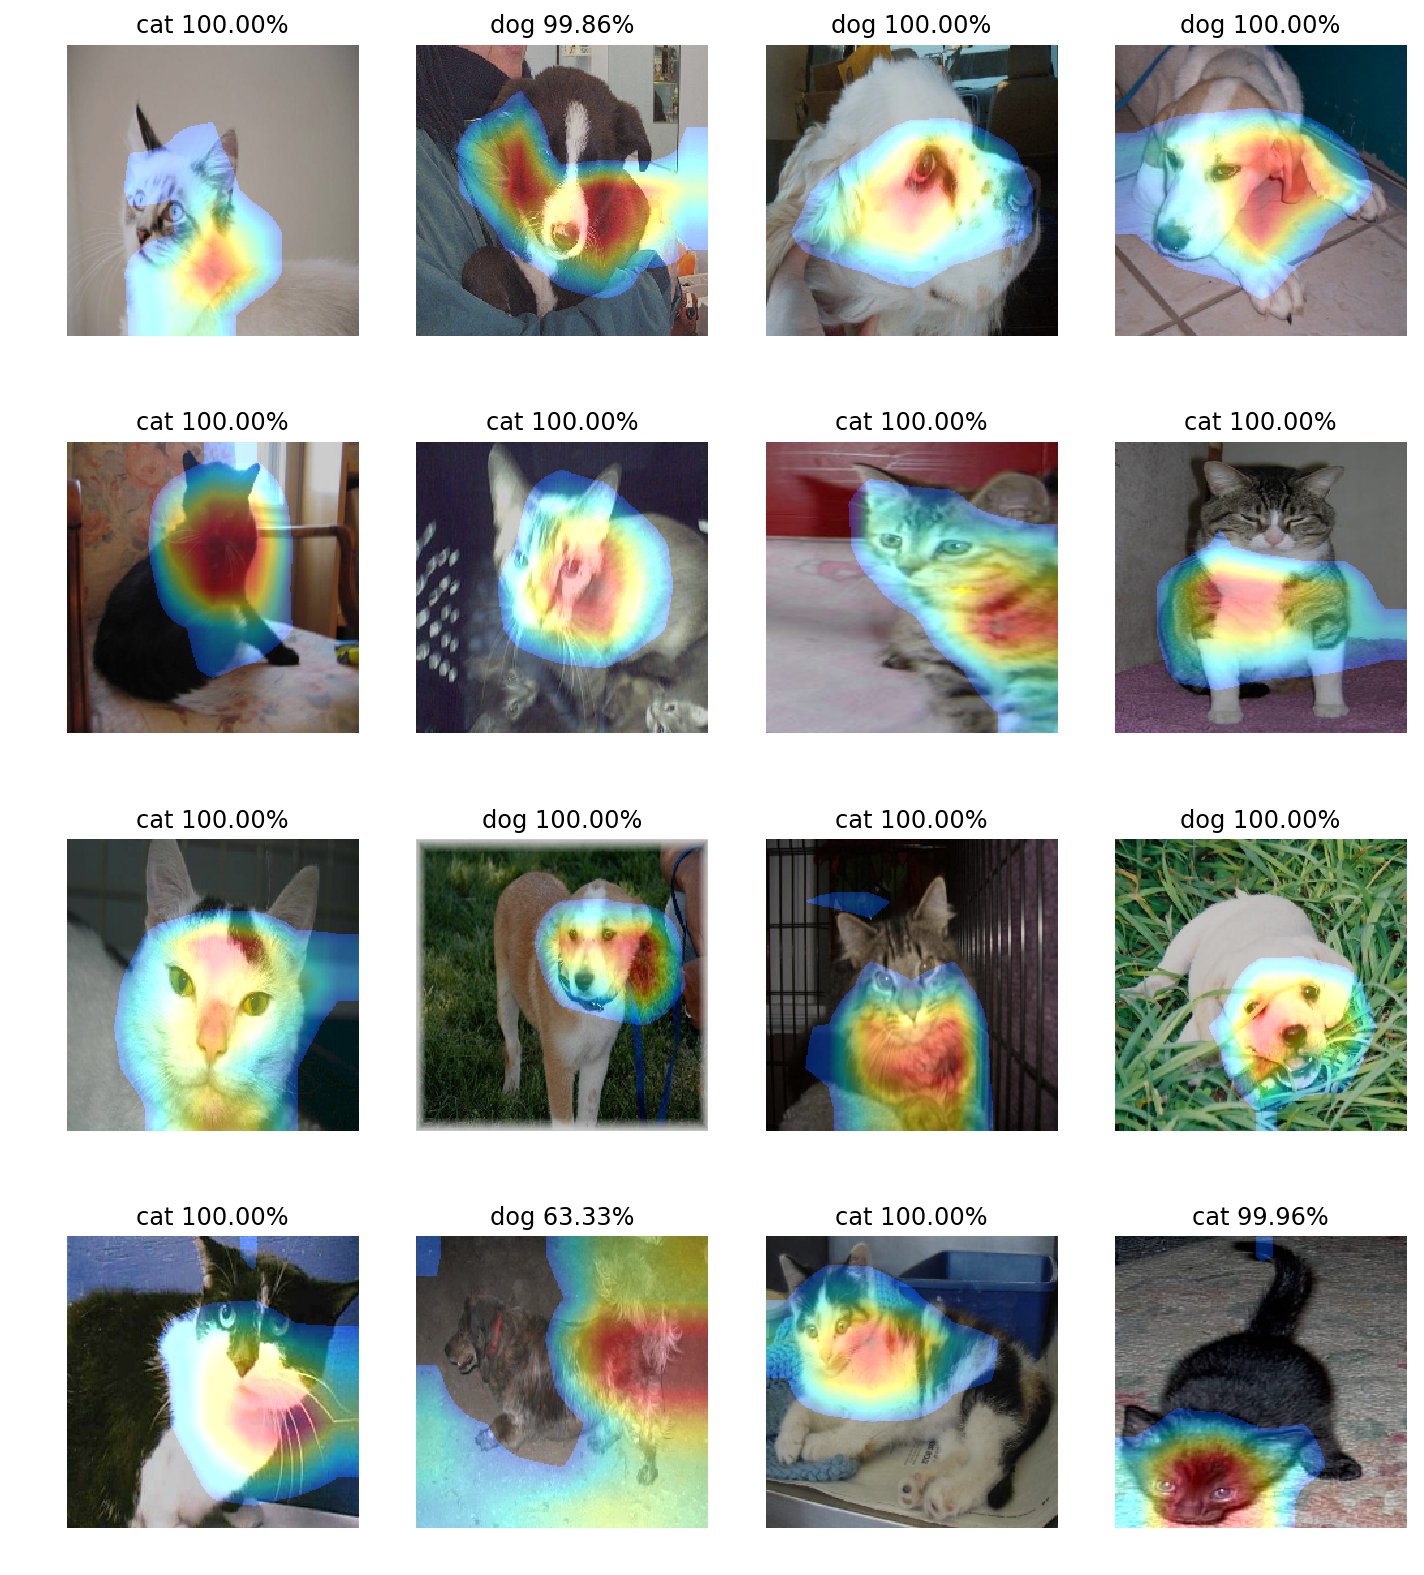

In [18]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 14))
for i in range(16):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('test/%d.jpg' % random.randint(1, 12500))
    img = cv2.resize(img, (224, 224))
    x = img.copy()
    x.astype(np.float32)
    out, prediction = model2.predict(np.expand_dims(x, axis=0))

    prediction = prediction[0]
    out = out[0]

    if prediction < 0.5:
        plt.title('cat %.2f%%' % (100 - prediction*100))
    else:
        plt.title('dog %.2f%%' % (prediction*100))

    cam = (prediction - 0.5) * np.matmul(out, weights)
    cam -= cam.min()
    cam /= cam.max()
    cam -= 0.2
    cam /= 0.8

    cam = cv2.resize(cam, (224, 224))
    heatmap = cv2.applyColorMap(np.uint8(255*cam), cv2.COLORMAP_JET)
    heatmap[np.where(cam <= 0.2)] = 0

    out = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

    plt.axis('off')
    plt.imshow(out[:,:,::-1])

# Fine-tune

http://keras-cn.readthedocs.io/en/latest/blog/image_classification_using_very_little_data/

In [11]:
for layer in model.layers[140:]:
    layer.trainable = True

In [12]:
model.fit(X_train, y_train, batch_size=16, epochs=5, validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 165s - loss: 0.0743 - acc: 0.9702 - val_loss: 0.0428 - val_acc: 0.9842
Epoch 2/5
20000/20000 [==============================] - 164s - loss: 0.0718 - acc: 0.9728 - val_loss: 0.0430 - val_acc: 0.9842
Epoch 3/5
20000/20000 [==============================] - 164s - loss: 0.0715 - acc: 0.9713 - val_loss: 0.0409 - val_acc: 0.9848
Epoch 4/5
20000/20000 [==============================] - 164s - loss: 0.0647 - acc: 0.9745 - val_loss: 0.0407 - val_acc: 0.9850
Epoch 5/5
20000/20000 [==============================] - 164s - loss: 0.0672 - acc: 0.9733 - val_loss: 0.0407 - val_acc: 0.9850
